Importamos las librerias necesarias y leemos el archivo.

In [224]:
# Agregar la inflacion a los ingresos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [225]:
# Accesos por tecnologia
axt = pd.read_csv('../data/crudo/acc_x_tecnologia.csv')
axt['Año'] = axt['Año'].astype(str).str.replace('*', '', regex=False).str.strip() # Quitar los * , '' de 2019
axt['Año'] = pd.to_datetime(axt['Año'], format='%Y') # Formato fecha

## Análisis del Crecimiento Total de Conectividades por Año

Este análisis comienza con el objetivo de entender cómo ha evolucionado el número de conexiones de internet en Argentina, abarcando tecnologías como ADSL, Cablemódem, Fibra Óptica, Wireless, y otras. El enfoque principal está en el crecimiento real de usuarios año tras año, lo que nos permite observar tendencias sin ser afectados por distorsiones en los ingresos provocadas por la alta inflación en Argentina.

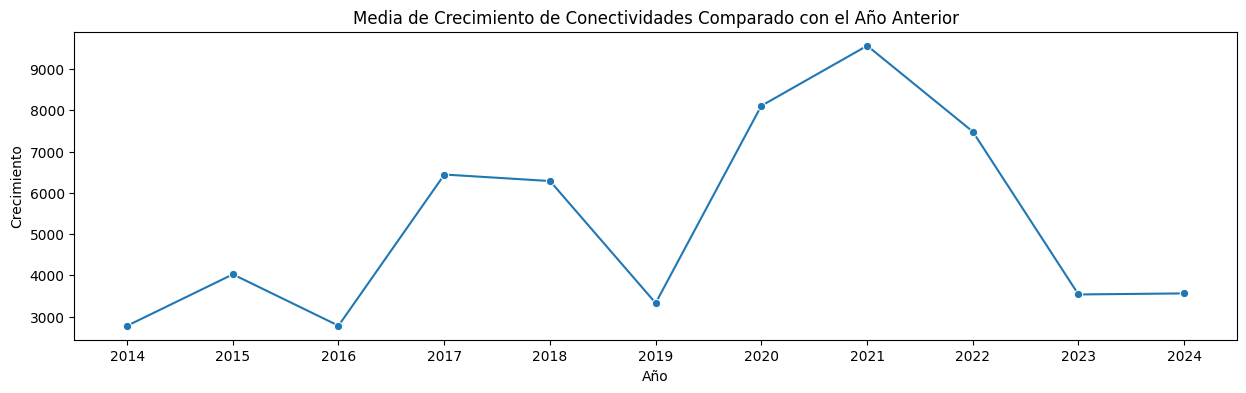

In [226]:
# Agrupar por provincia y año y calcular la suma total de conexiones
total_x_prov = axt.groupby(['Provincia', 'Año', 'Trimestre']).agg({'Total': 'sum'}).reset_index()
# Calcular el crecimiento de conexiones por provincia
total_x_prov['Crecimiento'] = total_x_prov.groupby('Provincia')['Total'].diff()

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov, x='Año', y='Crecimiento', marker='o', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior', fontsize=12)

plt.show()

## Conclusiones del Análisis de Crecimiento de Conexiones (2014-2024)

- **Tendencia Cíclica:** El crecimiento de conexiones muestra un patrón cíclico, con aumentos sostenidos durante dos años seguidos seguidos de descensos recurrentes. Basando en la tendencia actual, 2024 podria ser un año positivo para el crecimiento.

- **Relación con COVID-19:** Se observa un notable aumento en 2020-2021, probablemente impulsado por la pandemia y el incremento en la demanda de conectividad debido al trabajo remoto y la educación a distancia.

- **Situación Actual:** El crecimiento de conectividad en 2024 se mantiene al nivel de 2015, sugiriendo una estabilización en comparación con los picos anteriores.

**Nota:** Este análisis refleja la media del crecimiento de conexiones y puede estar influenciado por eventos específicos en distintas provincias.

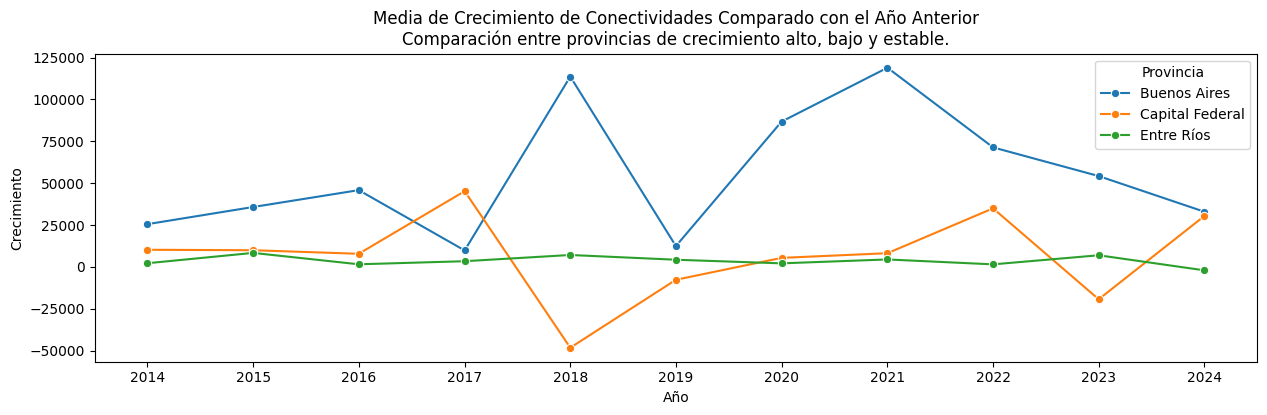

In [227]:
# Filtrar los datos para solo incluir outliers. Pude encontrar estos datos con un (hue='Provincia') en el grafico anterior.
total_x_prov_filtrado = total_x_prov[total_x_prov['Provincia'].isin(['Buenos Aires', 'Entre Ríos','Capital Federal'])]

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov_filtrado, x='Año', y='Crecimiento', marker='o', hue='Provincia', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior\nComparación entre provincias de crecimiento alto, bajo y estable.', fontsize=12)

plt.show()

### Conclusiones del Análisis de Crecimiento de Conexiones por provincias. (2014-2024)

- **Buenos Aires como Oportunidad de Crecimiento:** La provincia de Buenos Aires ha liderado el crecimiento de conectividad en el país, con picos significativos en 2018 y durante la pandemia, destacándose como un centro clave para la expansión del acceso a internet. Actualmente, el crecimiento se encuentra a niveles similares a los de 2016 y sigue a una caída de tres años consecutivos, situándose en la misma posición que Capital Federal. Esta estabilización sugiere una oportunidad para reactivar el crecimiento, proximamente veremos en que tecnologias de conectividad.


- **Correlación Inversa con Capital Federal:** A diferencia de Buenos Aires, Capital Federal muestra una correlación inversa en el crecimiento de conectividad. Mientras Buenos Aires crece, Capital Federal experimenta descensos marcados, sugiriendo que cuando una aumenta su conectividad, la otra tiende a disminuir.

- **Estabilidad en Entre Ríos:** Entre Ríos muestra un comportamiento estable en el tiempo, sin variaciones notables, lo que indica un mercado maduro sin grandes fluctuaciones en su conectividad.

### Veamos cuales son las tecnologias que destacan en estas provincias.

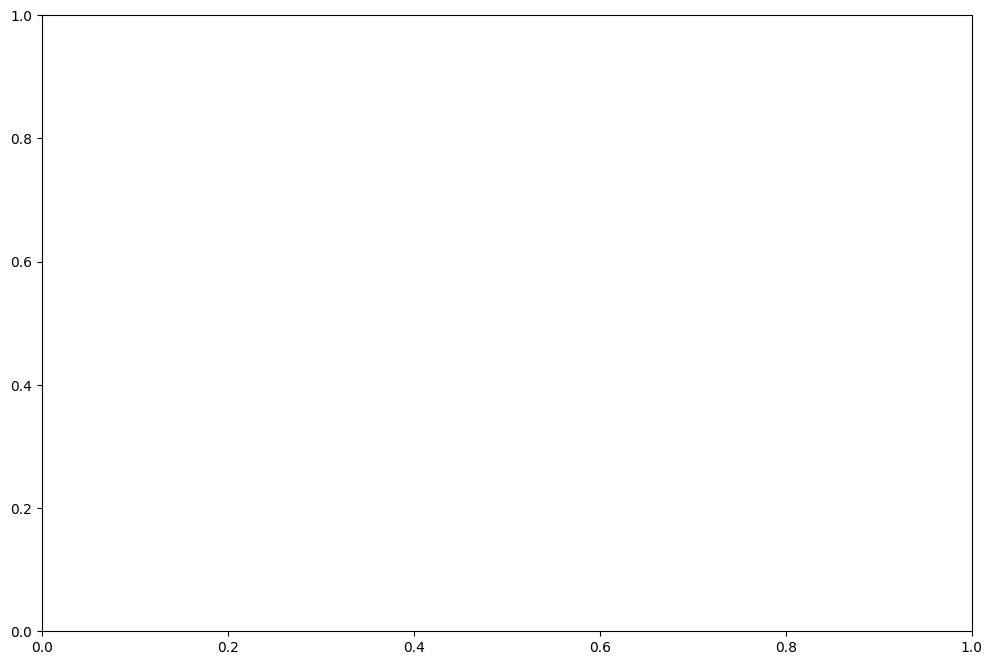

In [230]:
# Crear gráfico de barras apiladas con tecnologias sobre el total.
fig, ax = plt.subplots(figsize=(12, 8))


plt.show()